<a href="https://colab.research.google.com/github/Saloni1707/TrainModel/blob/main/LogicLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [12]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df.head()
#print(data.DESCR)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
X = data.data
y = data.target
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

features = X_train.shape[1]
weights = np.zeros(features)
bias=0
learning_parameter = 0.01
epochs = 300

def sigmoid(z):
  return 1/(1+np.exp(-z))

def predict(X,weights,bias):
  z = np.dot(X,weights)+bias
  return sigmoid(z)

losses = []
accu = []
for epoch in range(epochs):
  y_pred = predict(X_train,weights,bias)
  error = y_train - y_pred
  loss = np.mean(-(y_train * np.log(y_pred + 1e-15) + (1 - y_train)*np.log(1-y_pred + 1e-15)))
  losses.append(loss)

  dw = np.dot(X_train.T,error)/X_train.shape[0] #transpose liya first phir dot product
  db = np.sum(error) / X_train.shape[0]

  weights += learning_parameter * dw
  bias += learning_parameter * db

  y_test_pred = predict(X_test,weights,bias)
  y_test_prob = [1 if i > 0.5 else 0 for i in y_test_pred]
  accuracy = accuracy_score(y_test,y_test_prob)
  accu.append(accuracy)

print("Loss minimized")
print("Accuracy:",accuracy)

Loss minimized
Accuracy: 0.9824561403508771


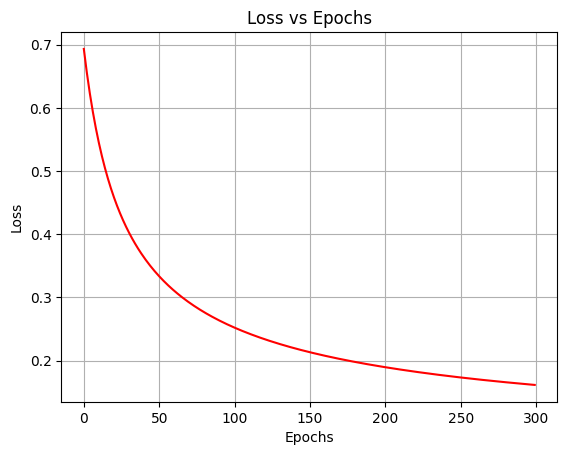

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(epochs),losses,color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid(True)
plt.show()

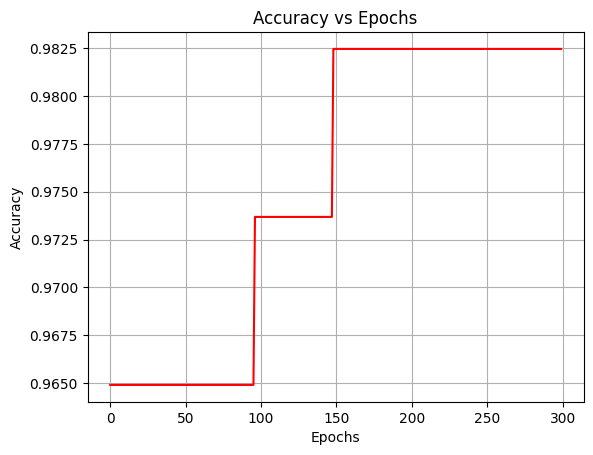

In [27]:
plt.plot(range(epochs), accu, color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.grid(True)
plt.show()
